<h2 align="center"> Statistical Learning 1 </h2>
<h2 align="center"> Proyecto #2 </h2>

# Notebook #2
## Ingenieria de Caracteristicas
** Marvin Diaz Carnet 9516008 **

> 1. EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features


## 1. Simple EDA 

In [120]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set()

#### Carga y Exploración de datos

In [121]:
df = pd.read_csv('C:/UCI HAR Dataset/Human_Activity_Recognition_Using_Smartphones_Data.csv')

In [55]:
## Examinando las columnas, buscando datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [56]:
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Guardando copia de los datos

Number of rows in the data: 10299
Number of columns in the data: 562


In [57]:
# Informacion del dataset
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


## 2. Sesgando variables asimetricas



In [59]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
...,...,...,...,...,...,...,...,...
Activity_SITTING,10299.0,0.172541,0.377868,0.0,0.000000,0.000000,0.000000,1.0
Activity_STANDING,10299.0,0.185067,0.388370,0.0,0.000000,0.000000,0.000000,1.0
Activity_WALKING,10299.0,0.167201,0.373173,0.0,0.000000,0.000000,0.000000,1.0
Activity_WALKING_DOWNSTAIRS,10299.0,0.136518,0.343355,0.0,0.000000,0.000000,0.000000,1.0


In [60]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity_SITTING,Activity_STANDING,Activity_WALKING,Activity_WALKING_DOWNSTAIRS,Activity_WALKING_UPSTAIRS
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,0,1,0,0,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.732626,0.703511,-0.844788,0.180289,-0.054317,0,1,0,0,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.100699,0.808529,-0.848933,0.180637,-0.049118,0,1,0,0,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.640011,-0.485366,-0.848649,0.181935,-0.047663,0,1,0,0,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.693578,-0.615971,-0.847865,0.185151,-0.043892,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.884904,-0.698885,-0.651732,0.274627,0.184784,0,0,0,0,1
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.657421,0.322549,-0.655181,0.273578,0.182412,0,0,0,0,1
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,0.696663,0.363139,-0.655357,0.274479,0.181184,0,0,0,0,1
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.929294,-0.008398,-0.659719,0.264782,0.187563,0,0,0,0,1


In [107]:
import pandas as pd
l = [{'Activity':'Sitting'},{'Activity':'Walking'},{'Activity':'Standing'},{'Activity':'Walking_Downstairs'},{'Activity':'Walking_Upstairs'},{'Activity':'Laying'}]
df = pd.DataFrame(l)
print(df)  

             Activity
0             Sitting
1             Walking
2            Standing
3  Walking_Downstairs
4    Walking_Upstairs
5              Laying


### Log transforming skew variables

In [111]:
# Creando una lista de variables tipo float para chequear sesgo
mask = df.dtypes == np.float64
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [62]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
"fBodyAccJerk-bandsEnergy()-57,64",14.029486
"fBodyGyro-bandsEnergy()-33,40.1",12.360019
tGravityAcc-iqr()-X,12.342323
tGravityAcc-mad()-X,11.442273
tGravityAcc-std()-X,11.135826
...,...
tGravityAcc-min()-X,-1.626723
tGravityAcc-mean()-X,-1.629481
tGravityAcc-max()-X,-1.642526
tBodyGyroJerk-min()-Y,-1.979775


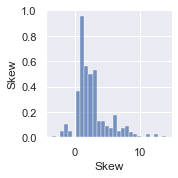

In [118]:
sns.pairplot(skew_cols, plot_kws=dict(alpha=.5, edgecolor='gray'))

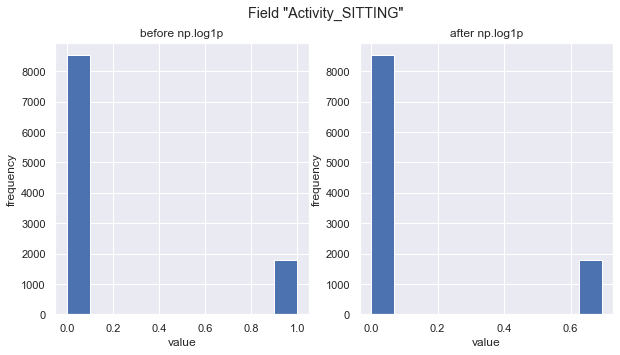

In [63]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Activity_SITTING"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [122]:
# Ejecutando la transformacion:

for col in skew_cols.index.values:
    if col == "Activity_SITTING":
        continue
    df[col] = df[col].apply(np.log1p)

In [123]:
# Evaluando si se transformo el data set
df.shape

(10299, 562)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [79]:
# Chequeando si existen datos faltantes. 
df = data
data.isnull().sum().sort_values()

tBodyAcc-mean()-X                   0
fBodyAccJerk-bandsEnergy()-17,24    0
fBodyAccJerk-bandsEnergy()-9,16     0
fBodyAccJerk-bandsEnergy()-1,8      0
fBodyAccJerk-kurtosis()-Z           0
                                   ..
tBodyGyroJerk-arCoeff()-X,4         0
tBodyGyroJerk-arCoeff()-Y,1         0
tBodyGyroJerk-arCoeff()-Y,2         0
tBodyGyroJerk-entropy()-Z           0
Activity                            0
Length: 562, dtype: int64

### Evaluando el minimo y maximo valor de los datos

In [80]:
df.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [81]:
df.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [125]:
# Escogiendo algunas variables numericas para evaluar si aplican algunas transformaciones
smaller_df= df.loc[:,['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',]]

In [83]:
# Evaluando estadisticas del subset
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
tBodyAcc-std()-Z,10299.0,-0.613064,0.403657,-1.0,-0.979137,-0.850773,-0.278737,1.0
tBodyAcc-mad()-X,10299.0,-0.633593,0.413333,-1.0,-0.993293,-0.948244,-0.302033,1.0
tBodyAcc-mad()-Y,10299.0,-0.525697,0.484201,-1.0,-0.977017,-0.843670,-0.087405,1.0
tBodyAcc-mad()-Z,10299.0,-0.614989,0.399034,-1.0,-0.979064,-0.845068,-0.288149,1.0
tBodyAcc-max()-X,10299.0,-0.466732,0.538707,-1.0,-0.935788,-0.874825,-0.014641,1.0


In [84]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tBodyAcc-mean()-X  10299 non-null  float64
 1   tBodyAcc-mean()-Y  10299 non-null  float64
 2   tBodyAcc-mean()-Z  10299 non-null  float64
 3   tBodyAcc-std()-X   10299 non-null  float64
 4   tBodyAcc-std()-Y   10299 non-null  float64
 5   tBodyAcc-std()-Z   10299 non-null  float64
 6   tBodyAcc-mad()-X   10299 non-null  float64
 7   tBodyAcc-mad()-Y   10299 non-null  float64
 8   tBodyAcc-mad()-Z   10299 non-null  float64
 9   tBodyAcc-max()-X   10299 non-null  float64
dtypes: float64(10)
memory usage: 804.7 KB


In [85]:
# No se determinaron variables nulas
smaller_df = smaller_df.fillna(0)

In [86]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tBodyAcc-mean()-X  10299 non-null  float64
 1   tBodyAcc-mean()-Y  10299 non-null  float64
 2   tBodyAcc-mean()-Z  10299 non-null  float64
 3   tBodyAcc-std()-X   10299 non-null  float64
 4   tBodyAcc-std()-Y   10299 non-null  float64
 5   tBodyAcc-std()-Z   10299 non-null  float64
 6   tBodyAcc-mad()-X   10299 non-null  float64
 7   tBodyAcc-mad()-Y   10299 non-null  float64
 8   tBodyAcc-mad()-Z   10299 non-null  float64
 9   tBodyAcc-max()-X   10299 non-null  float64
dtypes: float64(10)
memory usage: 804.7 KB



### Graficando el subset 
Escogiendo las variables del subset para evaluar relacion entre variables

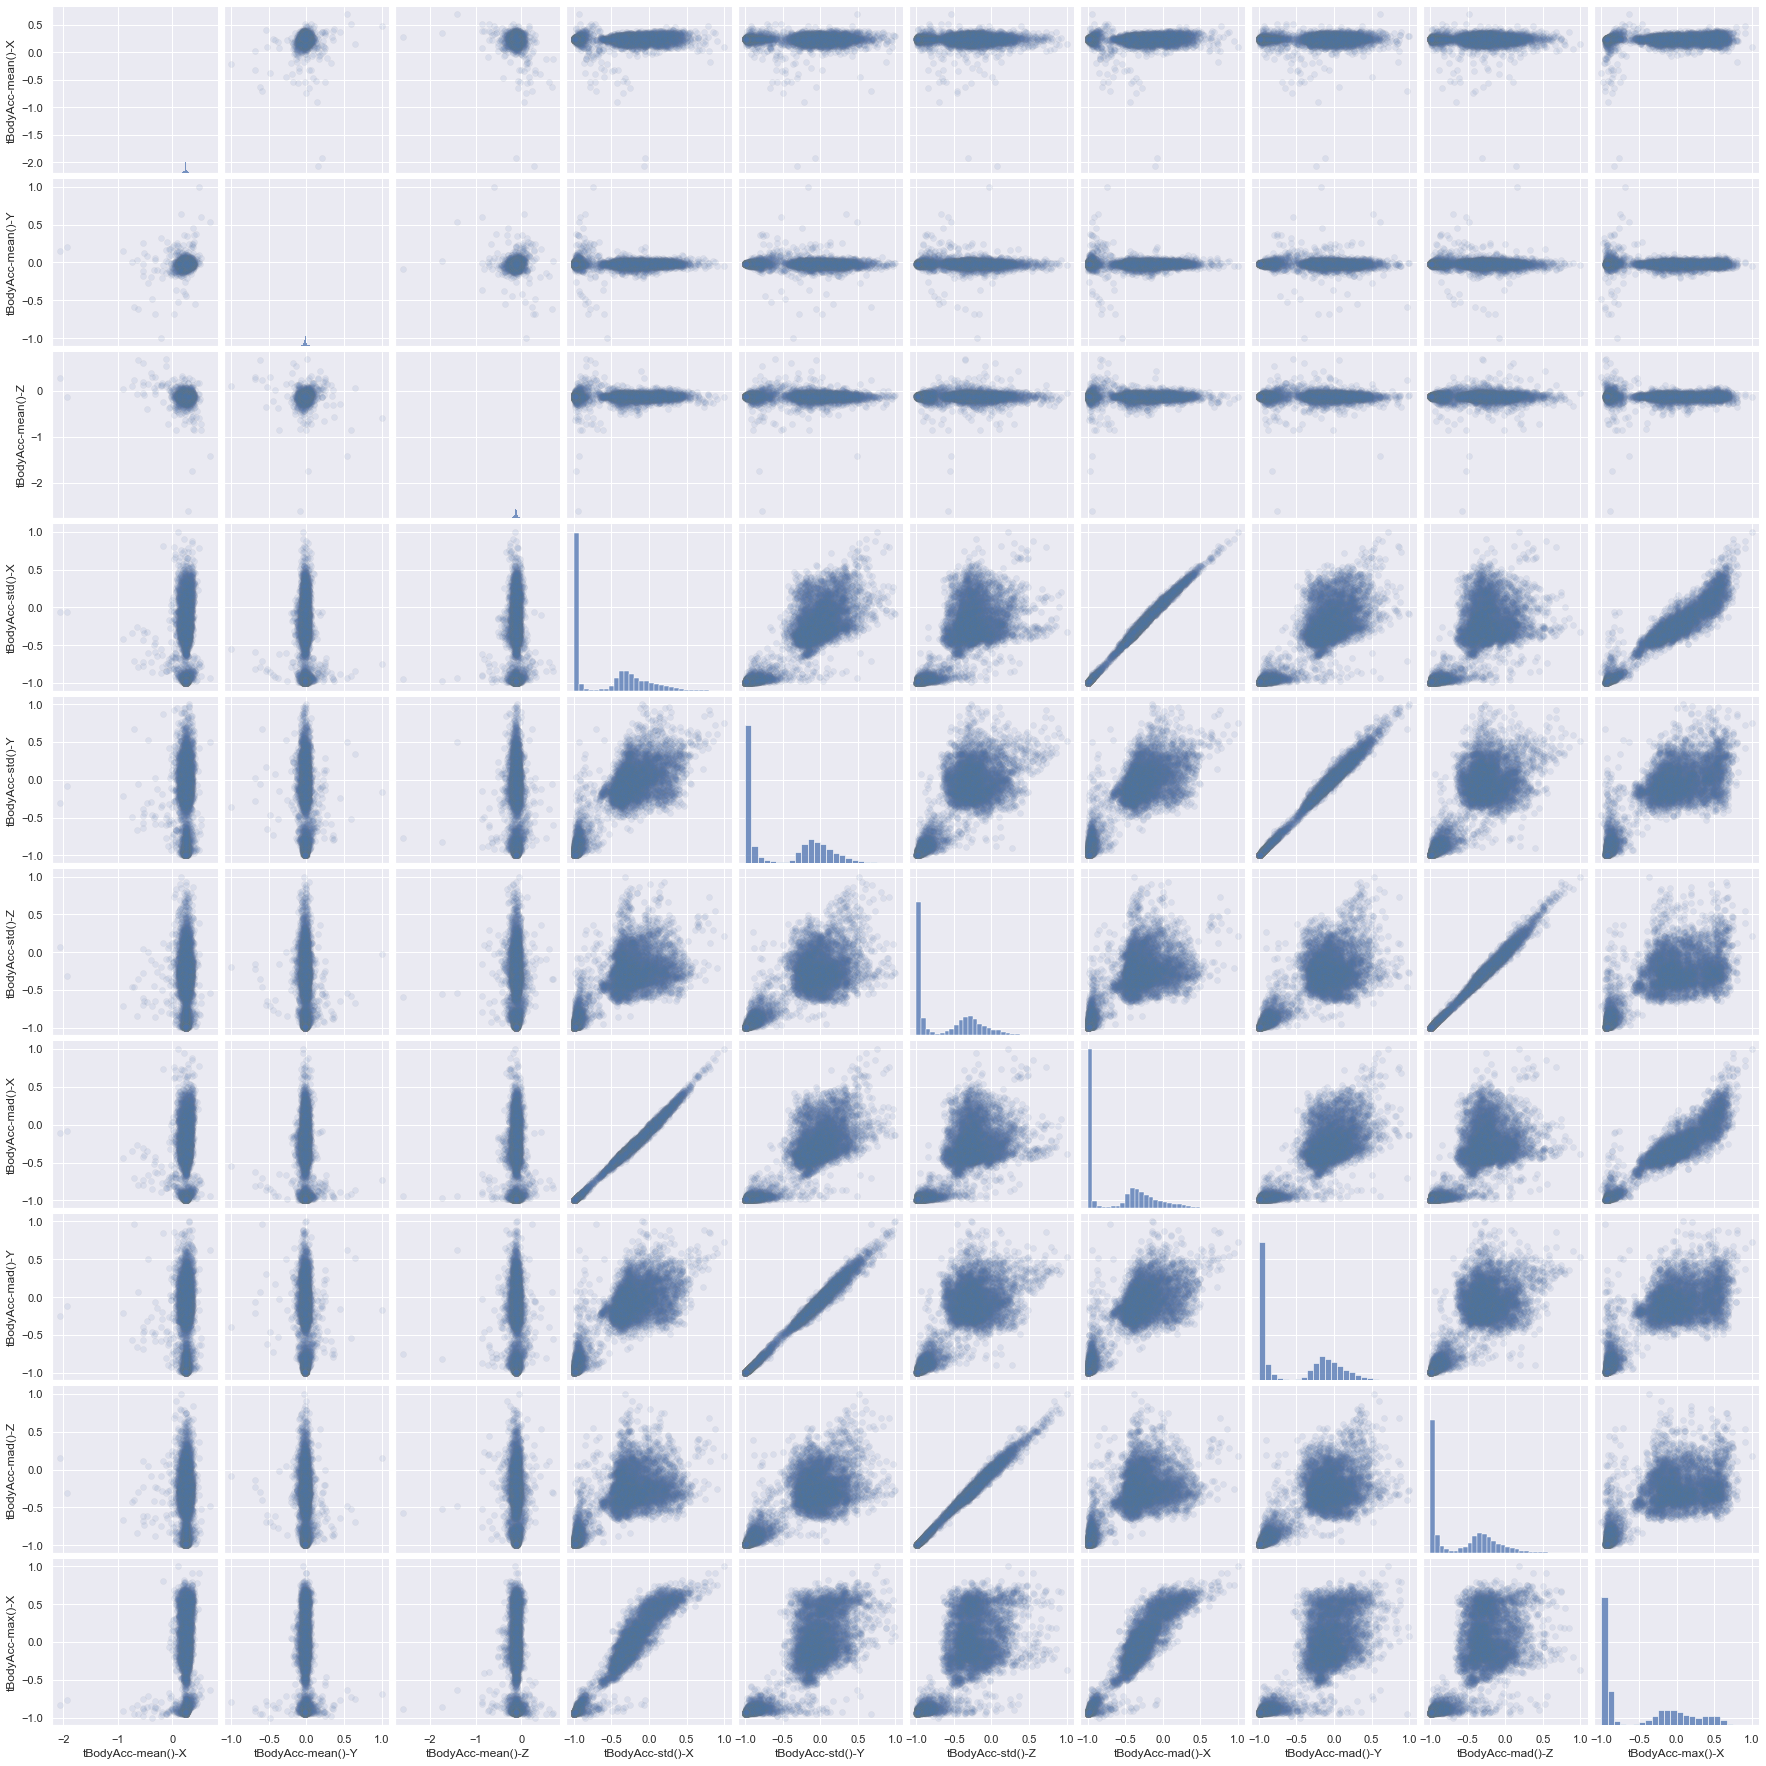

In [129]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='gray'))

## Transformación de Variable Predictiva
Se utilizo LabelEncoder para convertir las labels de Activity a integers, con esto se puede relacionar la variable a predecir.


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)


6322    1
2892    2
5221    4
836     5
2929    1
Name: Activity, dtype: int32